In [29]:
import pandas as pd
import json
import nltk
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Reading in data + clean-up

In [30]:
dataarr = []
file_path = 'fullrjokes.json'
with open(file_path, 'r') as f:
    for line in f:
        dataarr.append(json.loads(line))


In [31]:
df = pd.DataFrame(dataarr)

In [32]:
df.head(10)

,id,selftext,title,downs,ups,score,name,created_utc
0,66m0w,,A Day in Court,0,5,5,t3_66m0w,1.201282e+09
1,689ag,,Photograph of Software project Team,0,0,0,t3_689ag,1.202643e+09
2,689i2,,what we guys really like,0,3,3,t3_689i2,1.202651e+09
3,6abno,[deleted],Mississippi Grandmother,0,1,1,t3_6abno,1.204230e+09
4,6acro,,The Nietzsche Family Circus random generator,0,3,3,t3_6acro,1.204249e+09
5,6ayvz,[deleted],At the Welfare Office,0,5,5,t3_6ayvz,1.204733e+09
6,6br47,[deleted],Kid Wisdom,0,5,5,t3_6br47,1.205300e+09
7,6cxz4,,funny pic: His & Hers SUV,0,0,0,t3_6cxz4,1.206129e+09
8,6dcwm,,Bread is evil,0,8,8,t3_6dcwm,1.206478e+09
9,6dmyj,,Amish Joke,0,4,4,t3_6dmyj,1.206649e+09


In [33]:
df.selftext.value_counts()

selftext
[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

It looks like in this case the 'selftext' column contains the punchline to the joke. Since we need the punchline in order to fully analyze each joke, we will remove any rows with values that have been marked as '[deleted]', '[removed]', or have an empty string.

In [34]:
df = df.drop(df[df['selftext'].isin(['[deleted]', '[removed]', ''])].index)


We will also join the punchline of each joke to the lead-up in one column to make it easier for analysis.

In [35]:
df['joke'] = df['title'].str.cat(df['selftext'], sep=' ')
df.drop(['selftext', 'title'], axis =1, inplace = True)
df = df.reset_index()
df['joke'] = df['joke'].str.replace('\n', ' ') #removing newline characters from text

Now we will pre-process the text to make it easier for analysis.

In [36]:


# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

#more stop words
additional_stopwords = ['cant', 's', 'theyre', 'one', 'say', 'said', 'got', 'go', 'see', 'two', 'h', 'youre',
                        'what', 'whats', 'going', 'saying', 'asks', 'asked', 'asking', 'said', 'always', 'look',
                        'looked', 'hes', 'im', 'says', 'call', 'dont', 'take', 'joke', 'say', 'ive', 'ok', 'get', 'wa', 'well',
                       'ha', 'make', 'men', 'know']

def process_string(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Step 3: Remove digits
    text = ''.join([i for i in text if not i.isdigit()])
    
    # Step 4: Tokenize the text
    tokens = word_tokenize(text)
    
    # Step 5: Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Step 6: Remove stopwords
    stop_words = set(stopwords.words('english') + additional_stopwords)
    filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]
    
    # Join tokens back into a single string
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text


Due to Jupyter Notebooks not being able to handle all of the data, we will use a random sample of data of 20,000 observations to conduct our analysis.

In [37]:
sampled_df = df.sample(n=20000, random_state=42)

In [38]:
sampled_df['processed_joke'] = sampled_df['joke'].apply(process_string)

## Clustering + TF-IDF Vectorization

In [39]:

jokes = sampled_df['processed_joke']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(jokes)

In [40]:
tfidf_vectorized_data = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names_out()
)

In [41]:
tfidf_vectorized_data

,aa,aaa,aaaaaaaa,aaaaahhhh,aaaahhhhhhhaaaahhhh,aaaand,aaagh,aaah,aaahhh,aab,...,zwayne,zzzz,zzzzuck,öresund,κλίμα,κλίνω,ಠಠ,ḱley,ワン,喲媽媽這麼胖
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:


print(f"{X.nnz / np.prod(X.shape):.3f}")

0.001


We will use PCA in order to remove the dimensionality of the tf-idf dataset and remove all the noise. Using this new data we will perform K-means clustering so that we may group jokes with similar semantic meaning together.

C:\Users\alexander.smolentsev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


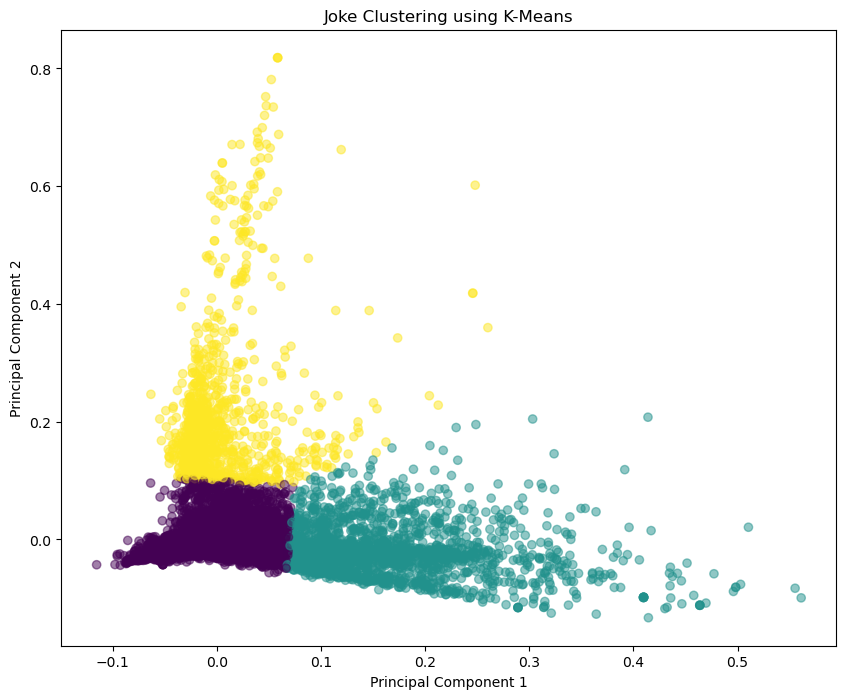

In [43]:

# Step 1: Perform PCA
pca = PCA(n_components=2)  # Change n_components to 2 for 2D
pca_data = pca.fit_transform(tfidf_vectorized_data)

# Step 2: Apply k-means clustering
kmeans = KMeans(n_clusters=3)  
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_

# Step 3: Plot the clustered data in 2D
plt.figure(figsize=(10, 8))

# Scatter plot with cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Joke Clustering using K-Means')

# Show the plot
plt.savefig('clustered_jokes_2d.png')
plt.show()



In [44]:


# Step 1: Assign Cluster Labels
sampled_df['Cluster'] = cluster_labels

# Step 2: Group Jokes by Cluster
grouped_jokes = sampled_df.groupby('Cluster')

# Step 3: Analyze Jokes within Each Cluster
for cluster, cluster_data in grouped_jokes:
    print(f"Cluster {cluster}:\n")
    # Example analysis - Print the first few jokes in the cluster
    print(cluster_data[['id', 'joke']].head(10), "\n")
    


Cluster 0:

            id                                               joke
222154  5enf6f  What TV station is the biggest dick of a chann...
271664  66qveo  My friend just died while masturbating He was ...
506872  c5tzs9  A girl asked me how big my penis is. I told he...
272927  67jykz  My doctor said "I understand you are experienc...
4829     oondd  What did Helen Keller name her dog? akjnveoajk...
459799  apgugp  If boys go to Jupiter to get more stupider... ...
149645  493b45  I saw the funniest joke on television the othe...
539941  dejuuz  You can tell a lot about a woman by her hands ...
421300  9no7bv  Kanye West inspires Donald Trump to become a r...
34447   1vfai7  Enjoyed this joke from r/EngineeringStudents A... 

Cluster 1:

            id                                               joke
184275  4uud0g  Get into heaven on a bad day A man comes home ...
44098   2anquh  An old man... An old man, living alone in a hu...
128208  3ty31b  A Man is Hunting and Accidentally 

In [17]:
cluster_0 = sampled_df[sampled_df['Cluster'] == 0]
cluster_0.to_csv('cluster_0.csv')

In [18]:
cluster_1 = sampled_df[sampled_df['Cluster'] == 1]
cluster_1.to_csv('cluster_1.csv')

In [19]:
cluster_2 = sampled_df[sampled_df['Cluster'] == 2]
cluster_2.to_csv('cluster_2.csv')

## Analysis

Now let's create wordclouds for each cluster of jokes so that we may analyze these jokes.

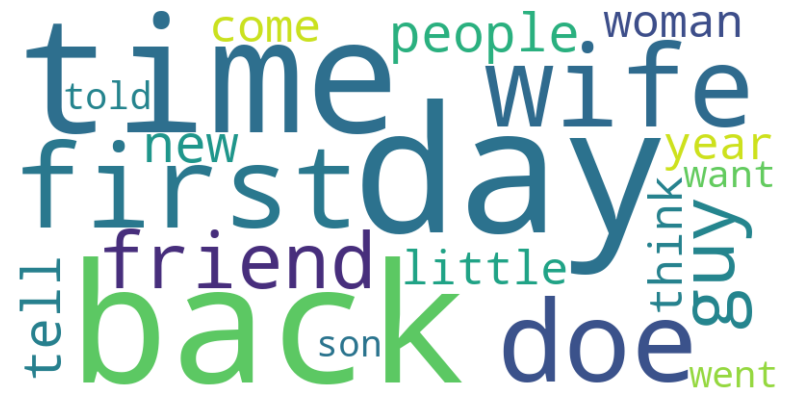

In [20]:



jokes_0 = cluster_0['processed_joke']
# Join all jokes into a single string
text = ' '.join(jokes_0)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, 
    max_words=20).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_0.png')
plt.show()


The presence of words like "told," "friend," "wife," and "son" suggests that this group might contain jokes revolving around personal experiences, relationships, and anecdotes.
In addition, words such as "year," "time," and "day" hint at jokes related to events, passing time, or daily occurrences.
Lastly, terms like "people," "friend," and "guy" may imply jokes about social interactions, gatherings, or everyday encounters.

In other words, cluster 0 mostly has jokes about everyday occurrences with friends and family.

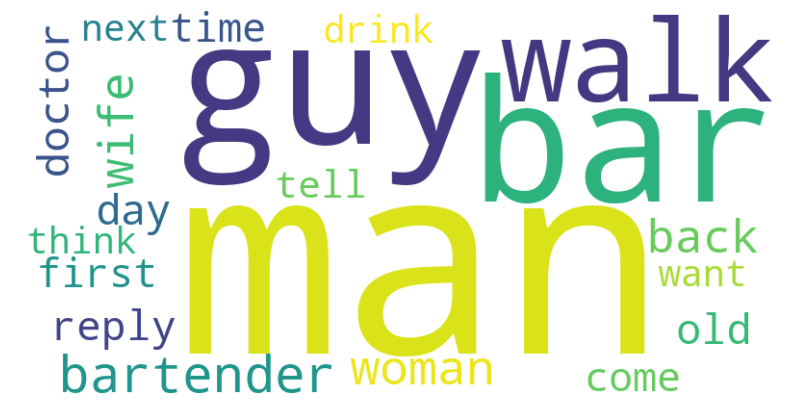

In [21]:
jokes_1 = cluster_1['processed_joke']
# Join all jokes into a single string
text = ' '.join(jokes_1)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, 
    max_words=20).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_1.png')
plt.show()

The presence of words like "bartender," "bar," "drink," and "walk" suggests that this group might contain jokes set in bars or social gatherings and keyywords like "wife," "woman," and "man" hint at jokes revolving around relationships.

It seems like the most common joke in this cluster follows the format of the "A man walks into a bar" joke.

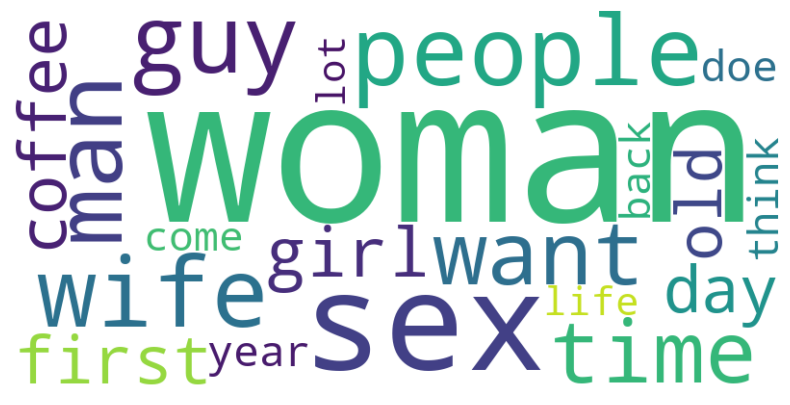

In [22]:
jokes_2 = cluster_2['processed_joke']
# Join all jokes into a single string
text = ' '.join(jokes_2)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, 
    max_words=20).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_2.png')
plt.show()

Keywords like "wife," "husband," "woman," and "guy" suggest jokes centered around relationships, marriage, and gender dynamics and the presence of words like "sex" and "girl" may imply jokes with sexual innuendos or themes.

I further explored these clusters of jokes by using Tableau to analyze the popularity of these different kinds of jokes among the Reddit population by using the 'Score' column as an indicator of popularity, meaning the higher the score, the more popular the joke.

The histogram on the left shows the distribution of scores for each cluster. For all three clusters, approximately 70% of their jokes were placed in the zero-bin. In general, each cluster had a similar distribution of scores for their respective jokes. Cluster 0 has a slightly higher proportion of higher scoring jokes compared to the other clusters.

Looking at the median, we can see that the median scores are not very high in general. However, cluster 1 has a slightly higher median thatn cluster 0 and cluster 2.

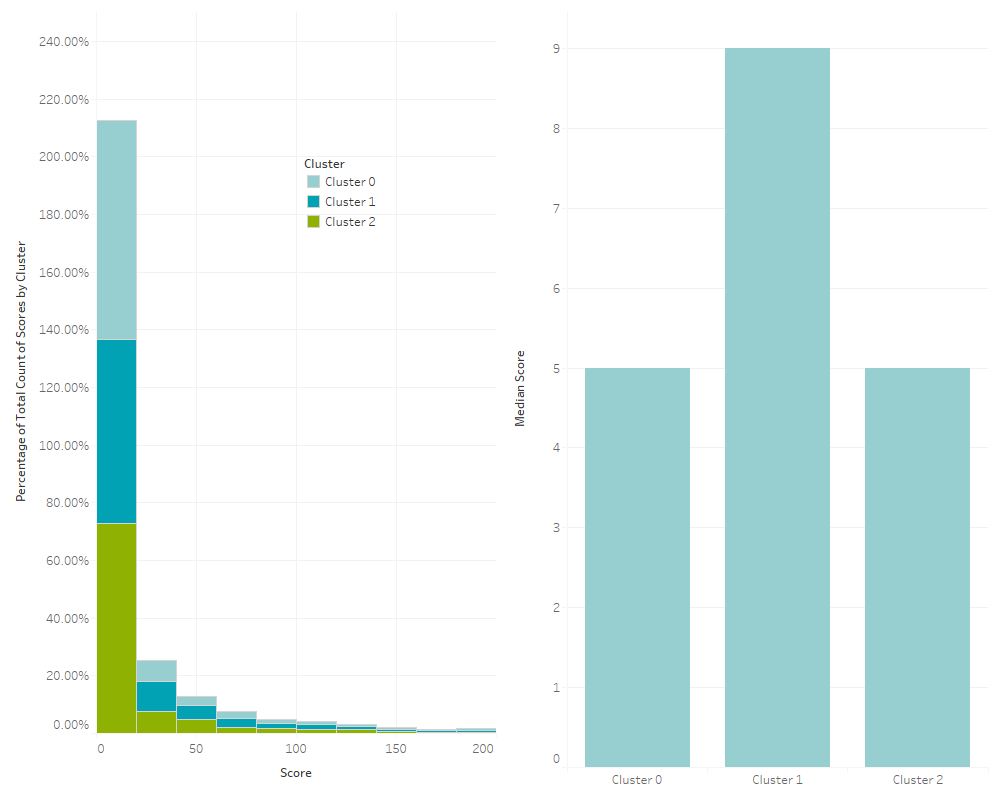

## Insights

If you're on reddit and want to post the highest possible scoring joke, I would suggest posting a joke in the format of "A man walks into a bar...". While it seems like most jokes tend to score similarly, this type of joke would help maximize your score. If you want to get even higher scores, I would suggest writing a joke that doesn't fit any of the categories mentioned above.